# Showing phase figures only at positions with high intensity



In [5]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"


In [6]:
from diffractio import um, np, degrees, mm
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY



In [7]:

from matplotlib import rcParams

rcParams['figure.dpi'] = 250


## XY

In [8]:
x = np.linspace(-250 * um, 250 * um, 1024)
y = np.linspace(-250 * um, 250 * um, 1024)
wavelength = 0.6238 * um
period = 50 * um
fill_factor = 0.5
angle = 0*degrees

t1 = Scalar_mask_XY(x, y, wavelength)
t1.circle(r0=(0, 0), radius=100*um, angle=0)

t1 = Scalar_source_XY(x, y, wavelength)
t1.gauss_beam(r0=(0, 0), w0=10*um, z0=0)


In [9]:
t2 = t1.RS(z=4*mm)


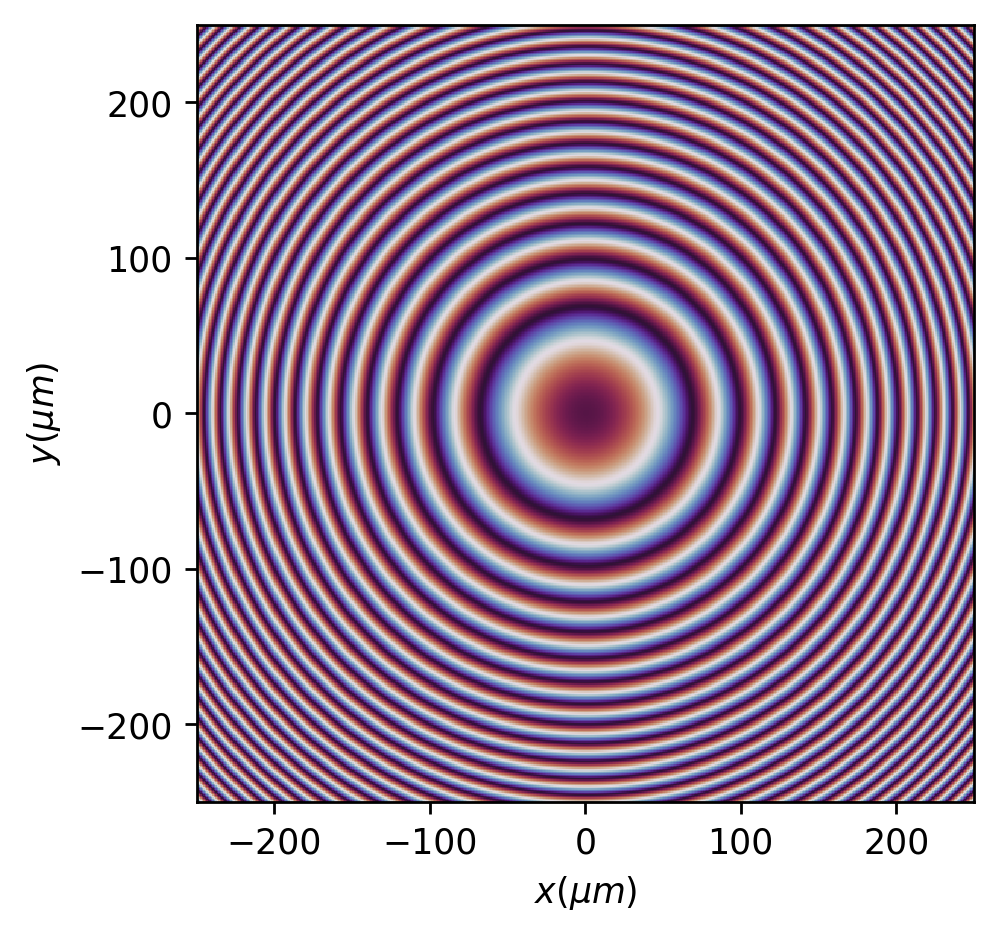

In [10]:
t2.draw('phase', percentage_intensity=0)


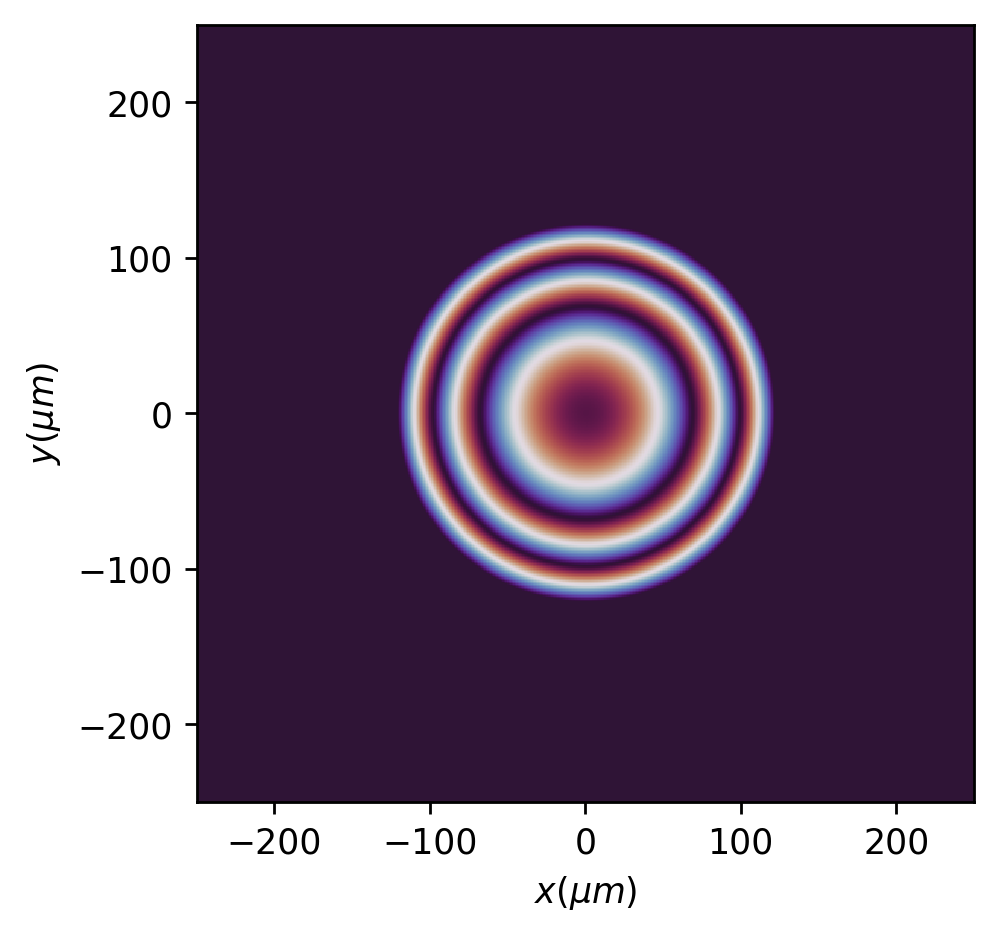

In [11]:
t2.draw('phase', percentage_intensity=0.01)


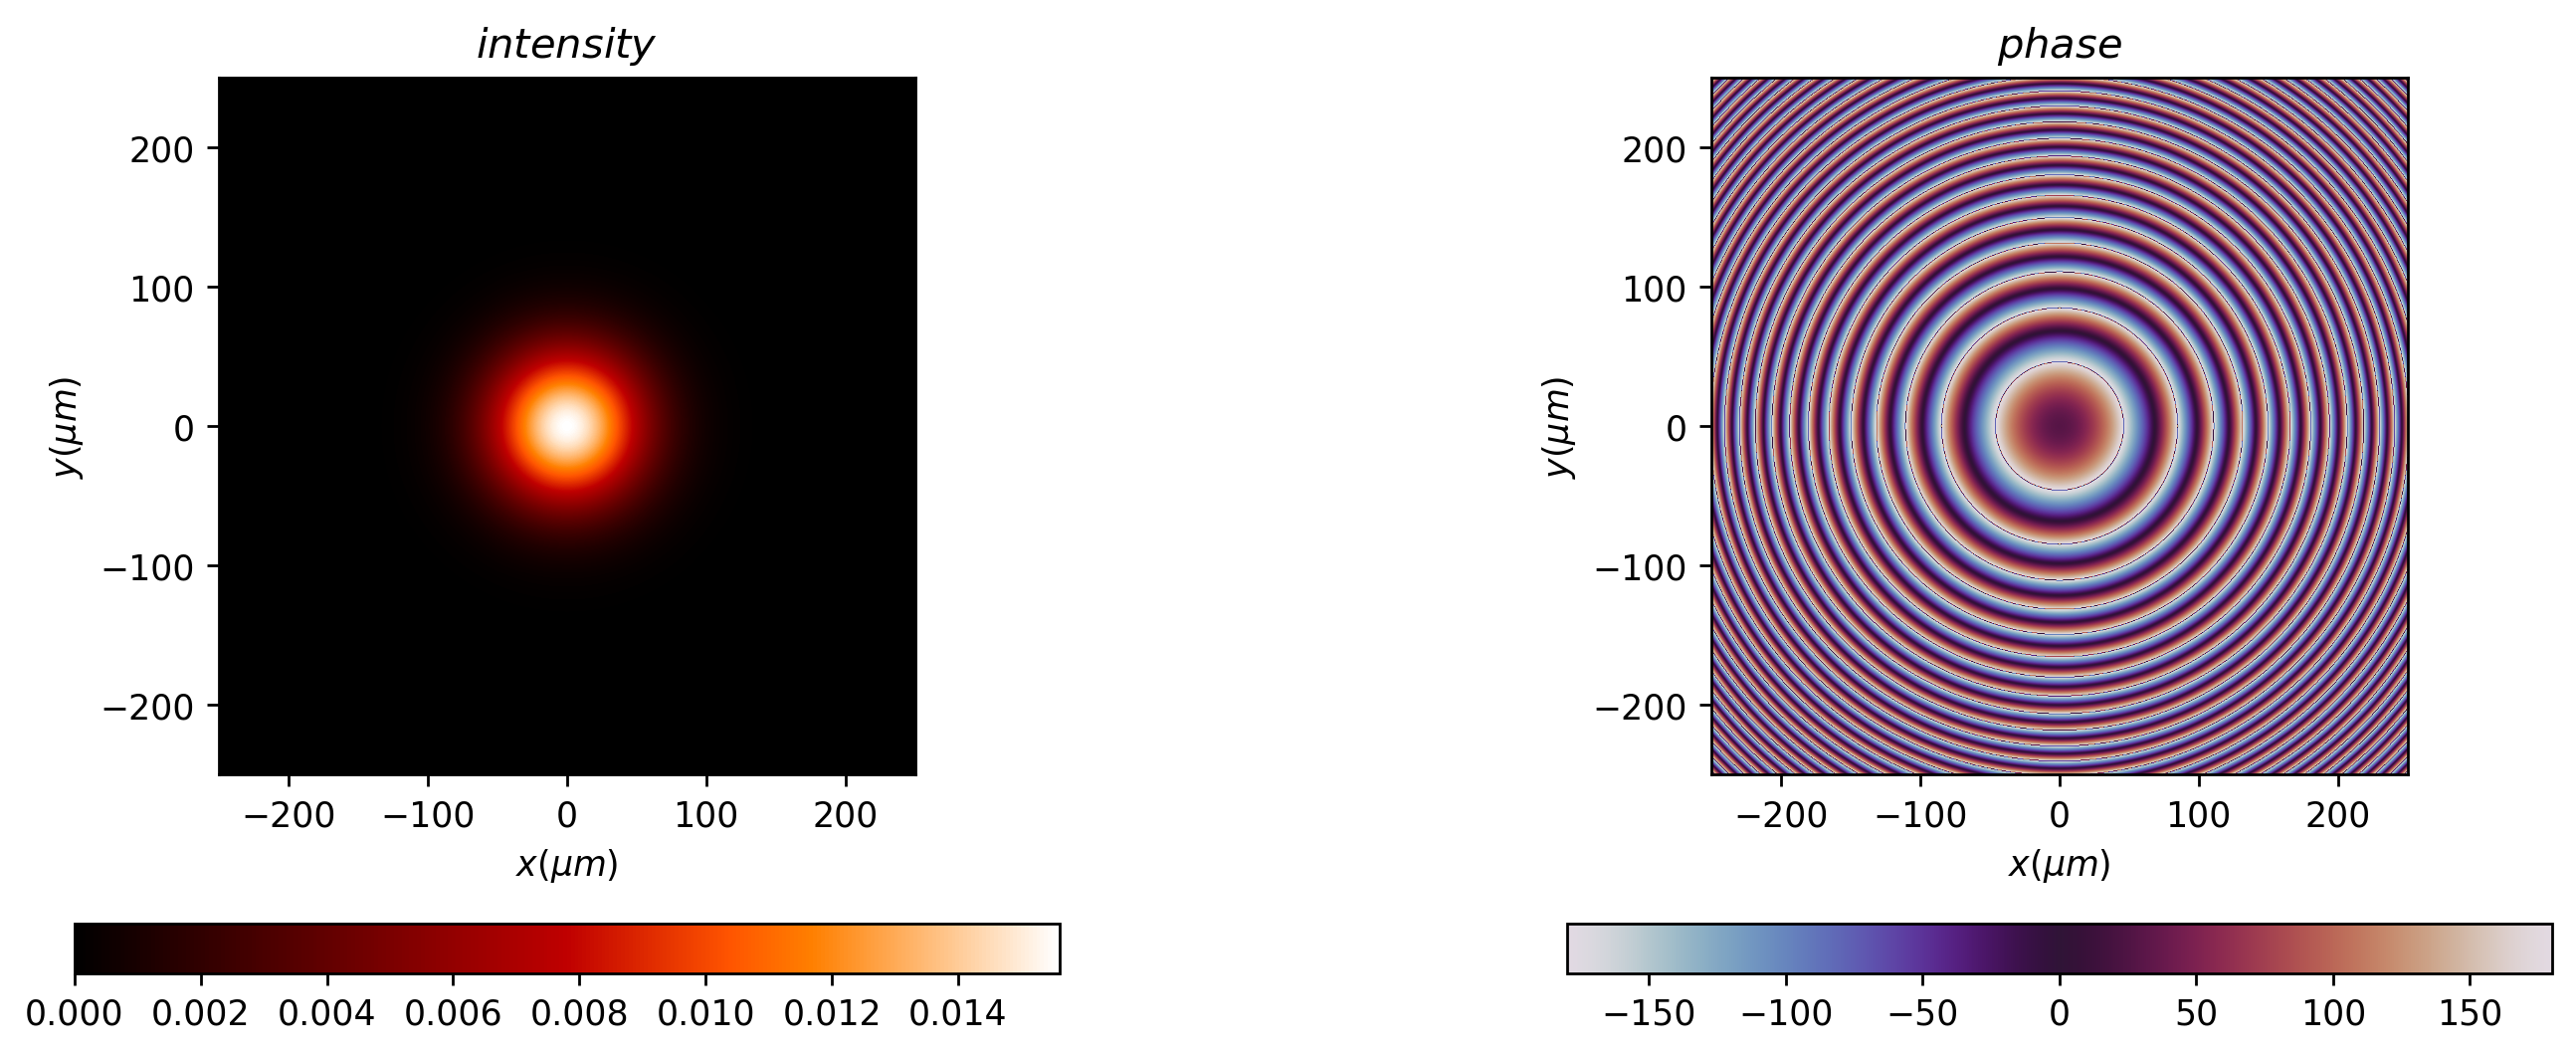

In [12]:
t2.draw('field', percentage_intensity=0)


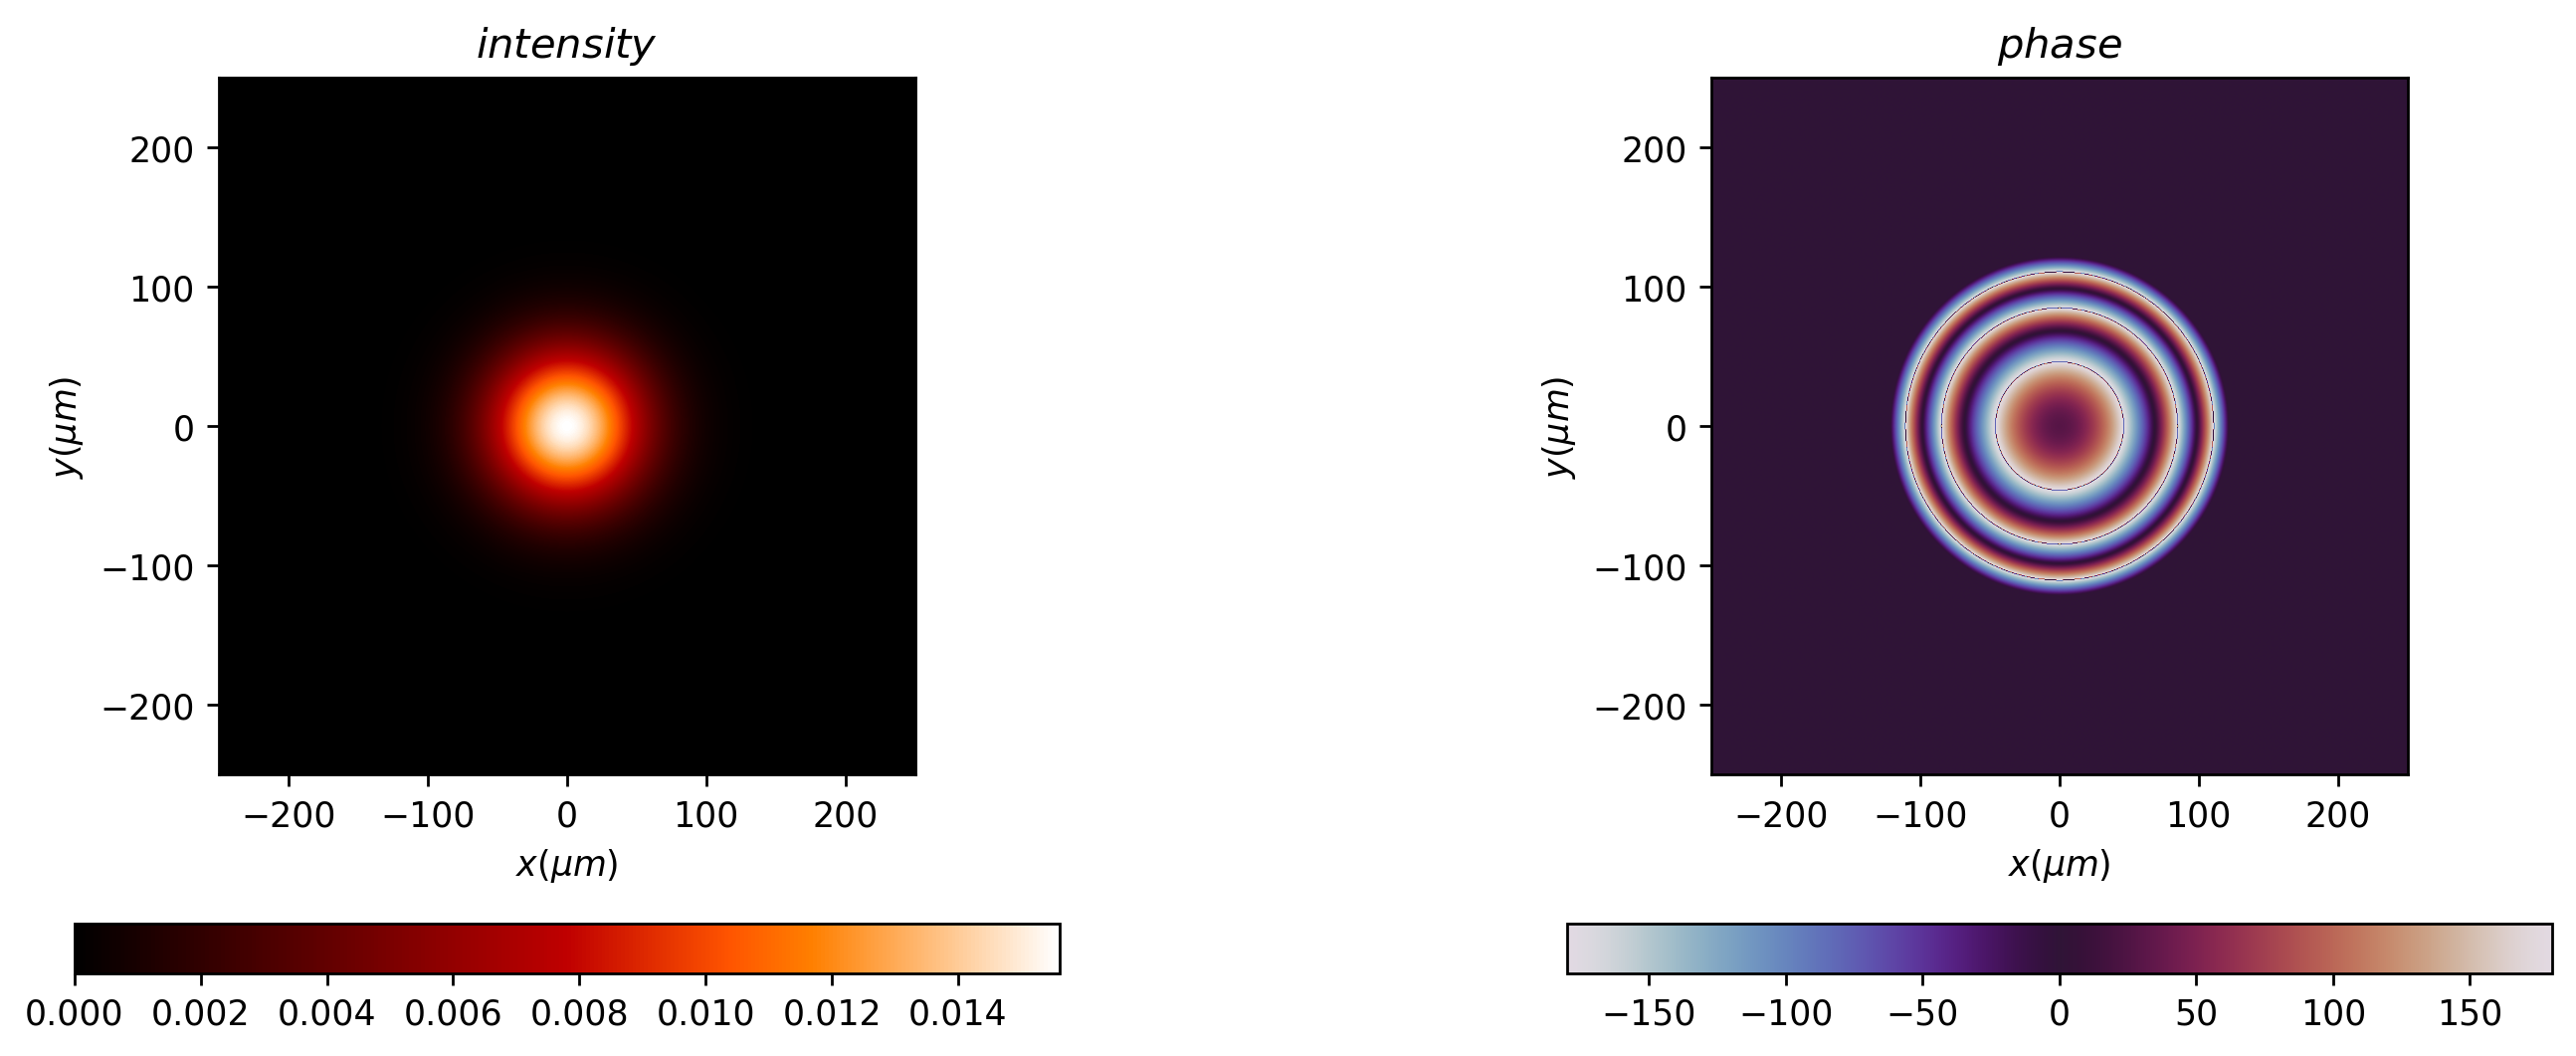

In [13]:
t2.draw('field', percentage_intensity=0.01)


## XZ

In [14]:
from diffractio.scalar_fields_XZ import Scalar_field_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X


In [15]:
length = 50 * um
wavelength = .5 * um
x0 = np.linspace(-length / 2, length / 2, 512)
z0 = np.linspace(0 * um, 500 * um, 256)

x_ini = -250 * um * np.tan(30 * degrees)

# source
f1 = Scalar_source_X(x0, wavelength)
f1.gauss_beam(A=1, x0=0, z0=250 * um, w0=2 * um, theta=0 * degrees)

u1 = Scalar_field_XZ(x=x0, z=z0, wavelength=wavelength)
u1.clear_refraction_index()
u1.incident_field(f1)
u1.WPM(verbose=False)


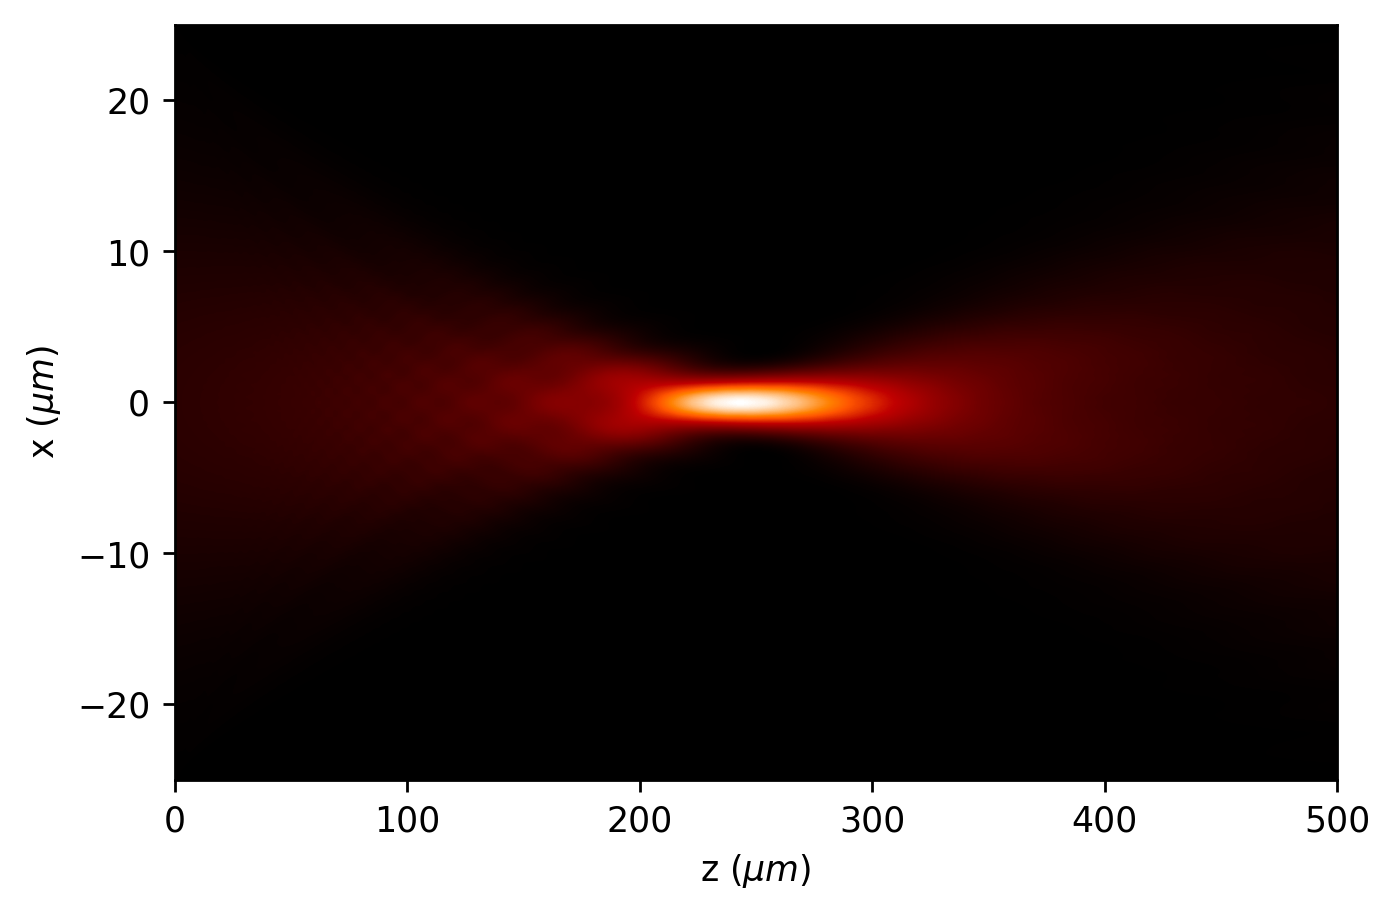

In [16]:
u1.draw('intensity')


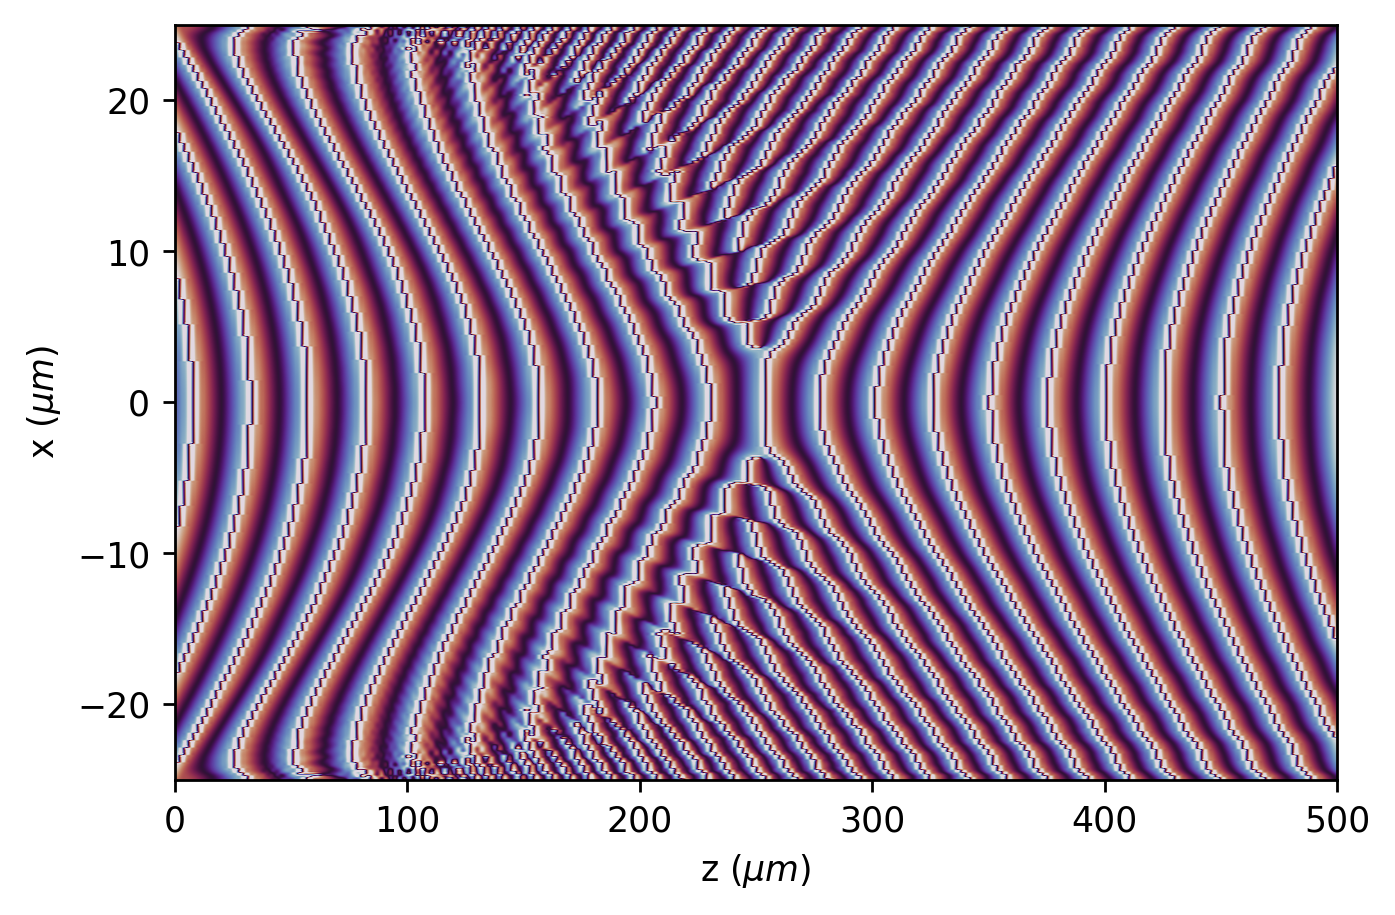

In [17]:
u1.draw('phase', percentage_intensity=0)


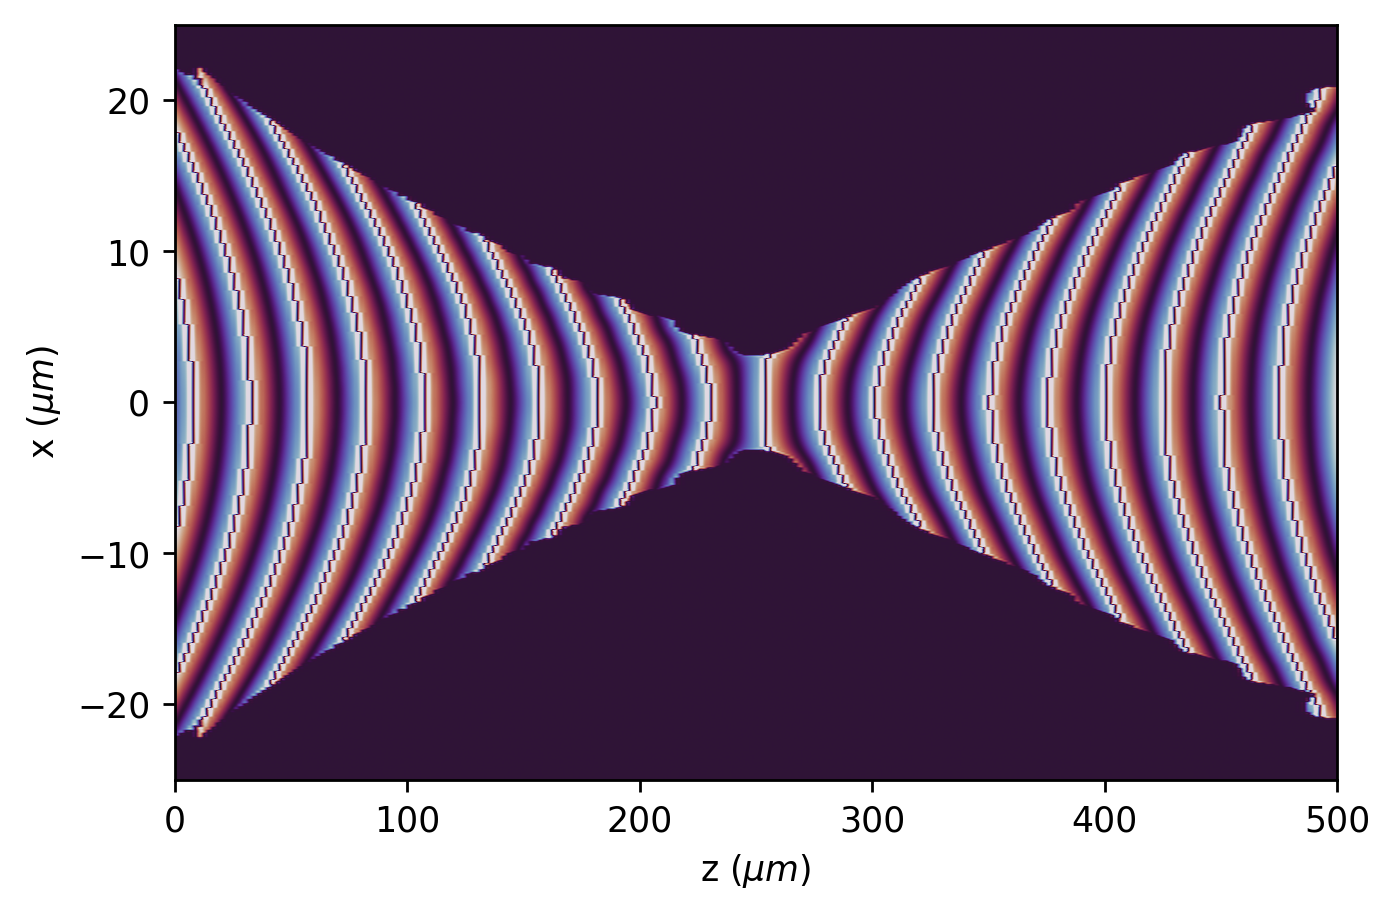

In [18]:
u1.draw('phase', percentage_intensity=0.01)


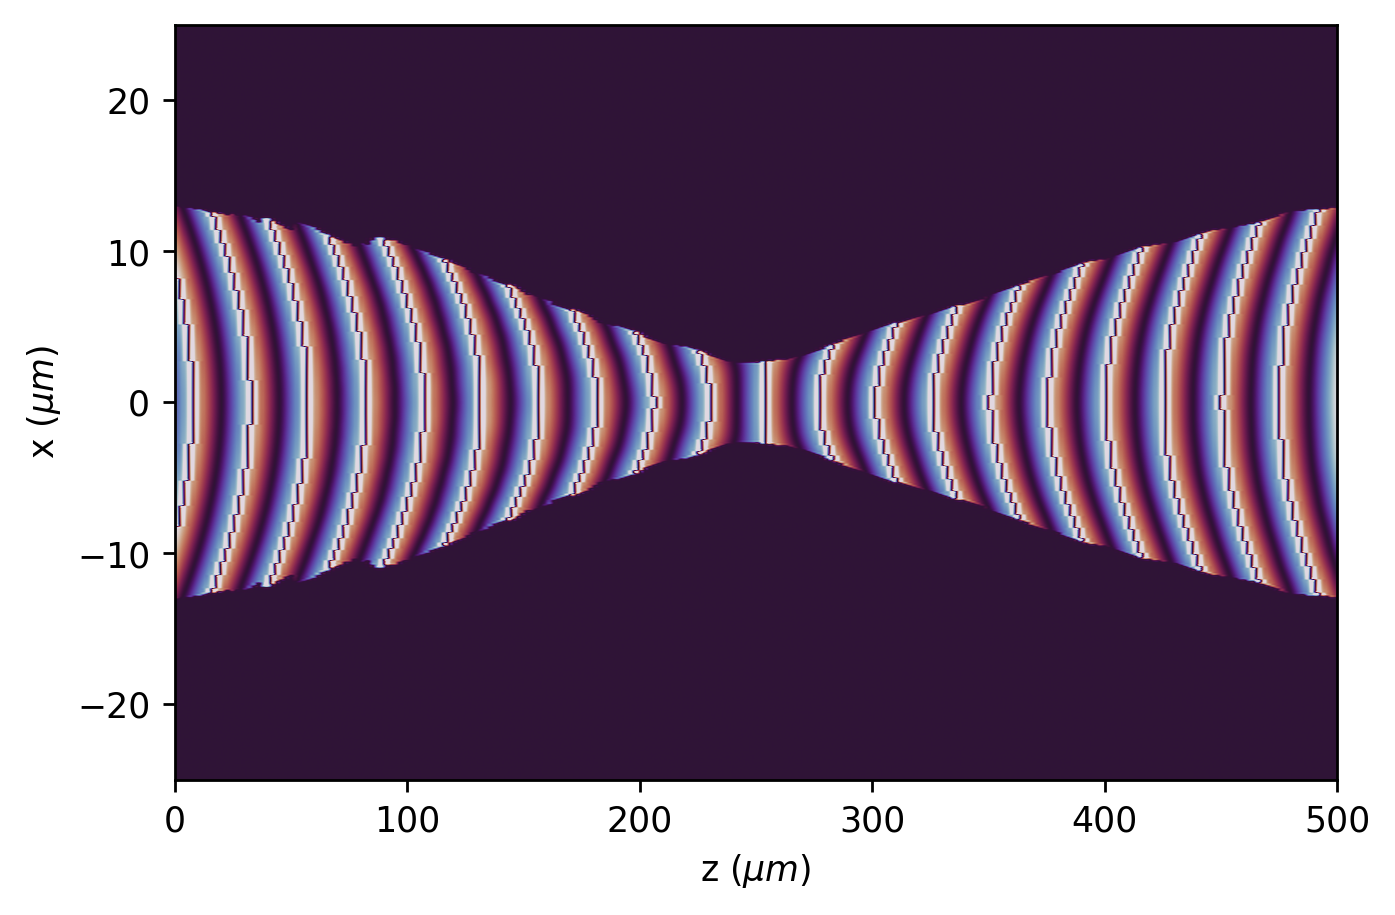

In [19]:
u1.draw('phase', percentage_intensity=0.05)
